References
* https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
* https://stackoverflow.com/questions/30885715/how-do-i-show-major-ticks-as-the-first-day-of-each-months-and-minor-ticks-as-eac
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html

In [9]:
# Dependencies
import pandas as pd
import random
import datetime as dt
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mpldt

In [10]:
# Functions

# This function analyzes a temperature normal column name and pulls out which type of normal it is (avg, min, max)
# Input and output are single strings
def findNormType(string):
    regex = re.compile('T([A-Z][A-Z][A-Z])-NORMAL')
    norm_type = regex.findall(string)
    return norm_type[0]

In [2]:
# Import in dataset
df = pd.read_csv('se-weather-cleaned.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
0,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-01,29.8,10.3,38.6,11.8,21.0,10.4,WV,Alamance County,27258
1,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-02,29.7,10.3,38.5,11.8,20.9,10.5,WV,Alamance County,27258
2,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-03,29.7,10.4,38.4,11.9,20.9,10.6,WV,Alamance County,27258
3,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-04,29.6,10.4,38.4,11.9,20.8,10.6,WV,Alamance County,27258
4,USC00461324,"CACAPON STATE PARK 2, WV US",39.5064,-78.3158,289.6,01-05,29.5,10.5,38.3,11.9,20.8,10.7,WV,Alamance County,27258


In [3]:
# Pull out only NC data
df_nc = df.loc[df['STATE'] == 'NC']
df_nc.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
110166,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-01,37.2,NaN,47.5,NaN,26.9,NaN,NC,Alamance County,27258
110167,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-02,37.1,NaN,47.4,NaN,26.7,NaN,NC,Alamance County,27258
110168,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-03,37.0,NaN,47.3,NaN,26.6,NaN,NC,Alamance County,27258
110169,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-04,36.9,NaN,47.3,NaN,26.5,NaN,NC,Alamance County,27258
110170,USC00313919,"HAW RIVER 1 E, NC US",36.0638,-79.383,193.9,01-05,36.8,NaN,47.2,NaN,26.4,NaN,NC,Alamance County,27258


In [4]:
# Determine number of unique stations in dataset
num_stations = df_nc['STATION'].nunique()
num_stations

159

In [5]:
# Create list of stations by name
station_names = df_nc['NAME'].unique()

# Randomly select one station from this list
rand_station = station_names[random.randint(0, len(station_names))]
rand_station

'REELSBORO, NC US'

In [6]:
# Filter the dataset to only this station and sort by date
rand_station_df = df_nc.loc[df_nc['NAME'] == rand_station].sort_values(by=['DATE'])
rand_station_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-STDDEV,DLY-TMAX-NORMAL,DLY-TMAX-STDDEV,DLY-TMIN-NORMAL,DLY-TMIN-STDDEV,STATE,COUNTY,ZIP
126270,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,01-01,44.9,NaN,55.2,NaN,34.6,NaN,NC,Pamlico County,28560
126271,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,01-02,44.9,NaN,55.1,NaN,34.6,NaN,NC,Pamlico County,28560
126272,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,01-03,44.8,NaN,55.1,NaN,34.6,NaN,NC,Pamlico County,28560
126273,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,01-04,44.8,NaN,55.1,NaN,34.6,NaN,NC,Pamlico County,28560
126274,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,01-05,44.8,NaN,55.0,NaN,34.6,NaN,NC,Pamlico County,28560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126631,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,12-27,45.3,NaN,55.6,NaN,34.9,NaN,NC,Pamlico County,28560
126632,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,12-28,45.2,NaN,55.5,NaN,34.8,NaN,NC,Pamlico County,28560
126633,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,12-29,45.1,NaN,55.4,NaN,34.7,NaN,NC,Pamlico County,28560
126634,USC00317170,"REELSBORO, NC US",35.131,-76.9153,13.7,12-30,45.0,NaN,55.3,NaN,34.7,NaN,NC,Pamlico County,28560


In [7]:
# Create variables for desired temperature boundaries for laying epoxy
max_temp_F = 100
min_temp_F = 50

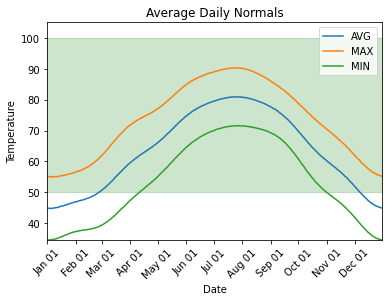

In [11]:
# Plot normals on graph

# Remove leapyear date
station_plot_df = rand_station_df[rand_station_df['DATE'] != '02-29']
fig, ax = plt.subplots()

# Create x and y's for normals
x = pd.to_datetime(station_plot_df['DATE'], format='%m-%d')
normals = ['DLY-TAVG-NORMAL', 'DLY-TMAX-NORMAL', 'DLY-TMIN-NORMAL']

# Plot normals
for norm in normals:
    ax.plot(x, station_plot_df[norm], label=findNormType(norm))

# Create legend
ax.legend()
# Format x tick labels
ax.xaxis.set_major_formatter(mpldt.DateFormatter('%b %d'))
ax.xaxis.set_tick_params(labelrotation=45)

# Set axes labels
ax.xaxis.set_label_text('Date')
ax.yaxis.set_label_text('Temperature')

# Create background colors for marking temperature boundaries
ax.fill_between(x, min_temp_F, max_temp_F, color='green', alpha=0.2)
ax.set_xlim(min(x), max(x))
max_temp = max(station_plot_df['DLY-TMAX-NORMAL'])
ylim_max = max(max_temp, max_temp_F)
ax.set_ylim(min(station_plot_df['DLY-TMIN-NORMAL']), (ylim_max + 5))

# Set title
plt.title('Average Daily Normals')

plt.show()
